# Жилкина Валерия. Лабораторная работа 1

### Задания:
1. Прокомментируйте программный код и результаты в файле lec01_HypothesisTesting.ipynb. (см. файл lec01_HypothesisTesting_ZhilkinaLera.ipynb)
2. Выполните интерпретацию данных на основе предварительного анализа с проверкой гипотез для данных своего проекта и данных из файла lab01_tips.csv*.
3. Интерпретация должна иллюстрироваться графиками и числовыми характеристиками распределения признаков, возможных зависимостей 

Импортируем необходимые библиотеки

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

Загркзим данные из csv файла. Для проверки успешного завершения операции посмотрим на данные:
1. Узнаем количество наблюдени1 и переменных
2. Выведем информацию о переменных
3. Исследуем описательную статистику (общий счет, чаевые, количество человек за столом)
4. Проведем анализ распределение категориальных переменных

In [3]:
# Загрузка данных
df = pd.read_csv('lab01_tips.csv')
print("Первые 5 строк данных:")
print(df.head())

print("\nОСНОВНАЯ ИНФОРМАЦИЯ О ДАННЫХ")
print("Размер данных:")
print(f"   Количество наблюдений: {df.shape[0]}")
print(f"   Количество переменных: {df.shape[1]}")

print("\nИнформация о переменных:")
print(df.info())

print("\n3. ОПИСАТЕЛЬНАЯ СТАТИСТИКА ЧИСЛОВЫХ ПЕРЕМЕННЫХ:")
print(df[['total_bill', 'tips', 'size']].describe().round(2))

print("\nРаспределение категориальных переменных:")
categorical_cols = ['sex', 'smoker', 'day_jf_week', 'time']
for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print(df[col].value_counts())
    print(f"Доля: {df[col].value_counts(normalize=True).round(3)}")

Первые 5 строк данных:
   total_bill  tips     sex smoker day_jf_week    time  size
0       16.99  1.01  Female     No         Sun  Dinner     2
1       10.34  1.66    Male     No         Sun  Dinner     3
2       21.01  3.50    Male     No         Sun  Dinner     3
3       23.68  3.31    Male     No         Sun  Dinner     2
4       24.58  3.61  Female     No         Sun  Dinner     4

ОСНОВНАЯ ИНФОРМАЦИЯ О ДАННЫХ
Размер данных:
   Количество наблюдений: 244
   Количество переменных: 7

Информация о переменных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   total_bill   244 non-null    float64
 1   tips         244 non-null    float64
 2   sex          244 non-null    object 
 3   smoker       244 non-null    object 
 4   day_jf_week  244 non-null    object 
 5   time         244 non-null    object 
 6   size         244 non-null    int64  


Визуализируем исследование данных, построив графики:
1. Распределения суммы счета и чаевых
2. Boxplot для выявления выбросов
3. Распределение количества человек за столом
4. Распределение по дням недели
5. Распределение по времени
6. Распределение по полу и курению

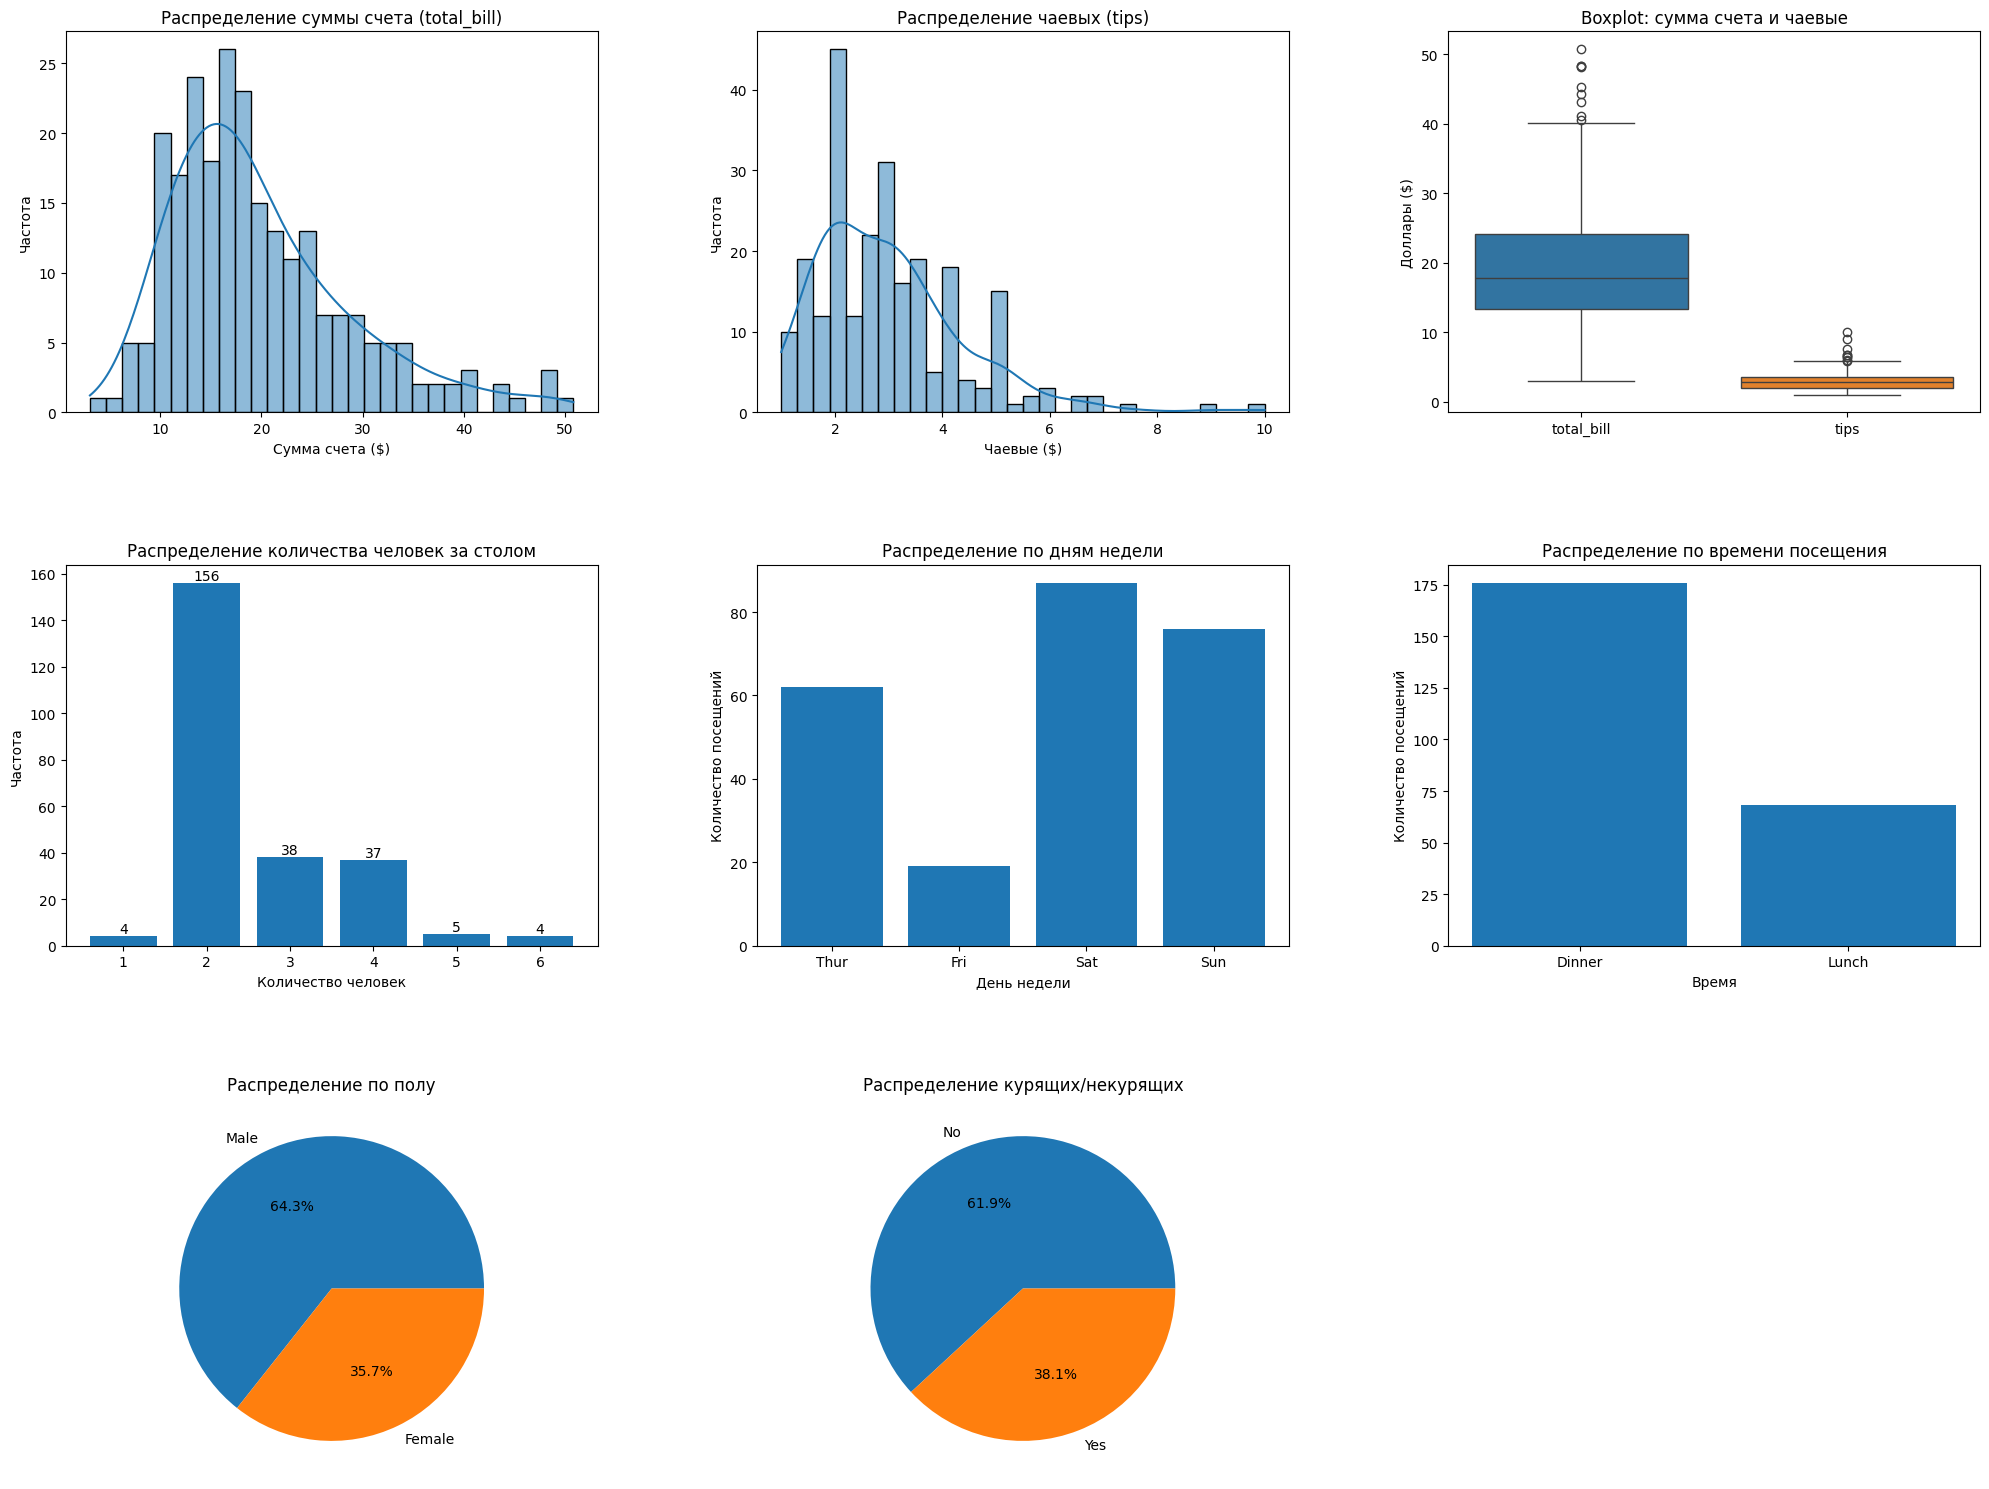

In [4]:
fig = plt.figure(figsize=(20, 15))

# График распределения суммы счета и чаевых
plt.subplot(3, 3, 1)
sns.histplot(df['total_bill'], kde=True, bins=30)
plt.title('Распределение суммы счета (total_bill)', fontsize=12)
plt.xlabel('Сумма счета ($)')
plt.ylabel('Частота')

plt.subplot(3, 3, 2)
sns.histplot(df['tips'], kde=True, bins=30)
plt.title('Распределение чаевых (tips)', fontsize=12)
plt.xlabel('Чаевые ($)')
plt.ylabel('Частота')

# Boxplot для выявления выбросов
plt.subplot(3, 3, 3)
sns.boxplot(data=df[['total_bill', 'tips']])
plt.title('Boxplot: сумма счета и чаевые', fontsize=12)
plt.ylabel('Доллары ($)')

# График распределения количества человек за столом
plt.subplot(3, 3, 4)
size_counts = df['size'].value_counts().sort_index()
plt.bar(size_counts.index, size_counts.values)
plt.title('Распределение количества человек за столом', fontsize=12)
plt.xlabel('Количество человек')
plt.ylabel('Частота')
for i, v in enumerate(size_counts.values):
    plt.text(size_counts.index[i], v, str(v), ha='center', va='bottom')

# График распределения по дням недели
plt.subplot(3, 3, 5)
day_order = ['Thur', 'Fri', 'Sat', 'Sun']
day_counts = df['day_jf_week'].value_counts().reindex(day_order)
plt.bar(day_counts.index, day_counts.values)
plt.title('Распределение по дням недели', fontsize=12)
plt.xlabel('День недели')
plt.ylabel('Количество посещений')

# График распределения по времени
plt.subplot(3, 3, 6)
time_counts = df['time'].value_counts()
plt.bar(time_counts.index, time_counts.values)
plt.title('Распределение по времени посещения', fontsize=12)
plt.xlabel('Время')
plt.ylabel('Количество посещений')

# График распределения по полу и курению
plt.subplot(3, 3, 7)
sex_counts = df['sex'].value_counts()
plt.pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%')
plt.title('Распределение по полу', fontsize=12)

plt.subplot(3, 3, 8)
smoker_counts = df['smoker'].value_counts()
plt.pie(smoker_counts.values, labels=smoker_counts.index, autopct='%1.1f%%')
plt.title('Распределение курящих/некурящих', fontsize=12)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.3) 
plt.show()

Для анализа нормальности распредления напишем функцию `check_normality()`, которая будет вычислять статистику Шапиро-Уилка и p-value, делая выводы на основании полученных значений.

In [5]:

# Функция для проверки нормальности
def check_normality(data, col_name):
    stat, p = stats.shapiro(data)
    print(f"\n{col_name.upper()}:")
    print(f"  Статистика Шапиро-Уилка: {stat:.4f}")
    print(f"  p-value: {p:.10f}")
    if p > 0.05:
        print(f"  Вывод: распределение нормальное (p > 0.05)")
    else:
        print(f"  Вывод: распределение НЕ нормальное (p < 0.05)")
    return p

# Проверяем нормальность
p_bill = check_normality(df['total_bill'], 'total_bill')
p_tips = check_normality(df['tips'], 'tips')


TOTAL_BILL:
  Статистика Шапиро-Уилка: 0.9197
  p-value: 0.0000000003
  Вывод: распределение НЕ нормальное (p < 0.05)

TIPS:
  Статистика Шапиро-Уилка: 0.8978
  p-value: 0.0000000000
  Вывод: распределение НЕ нормальное (p < 0.05)


Визуализируем на графике распределение нормальности

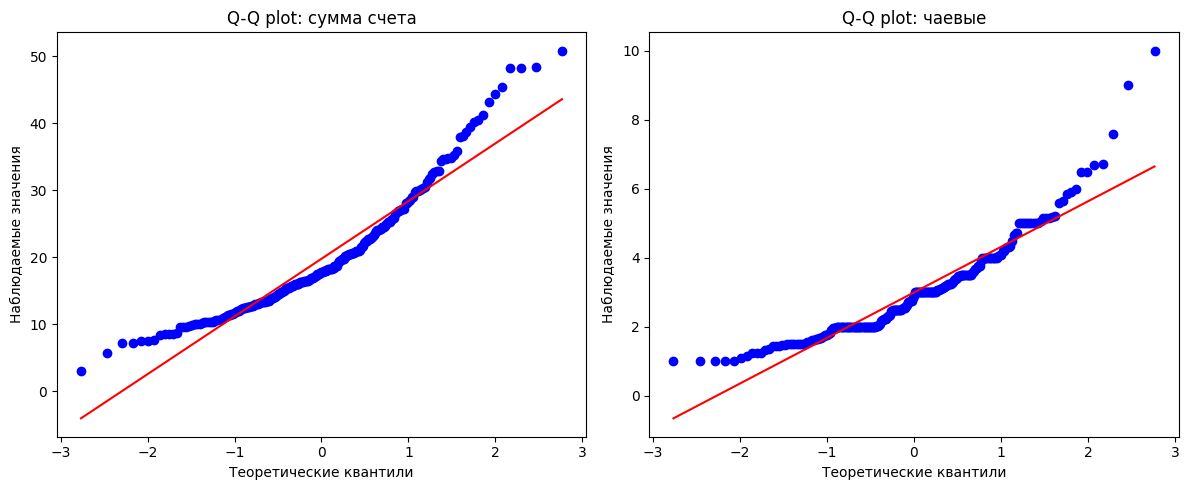

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

stats.probplot(df['total_bill'], dist="norm", plot=axes[0])
axes[0].set_title('Q-Q plot: сумма счета')
axes[0].set_xlabel('Теоретические квантили')
axes[0].set_ylabel('Наблюдаемые значения')

stats.probplot(df['tips'], dist="norm", plot=axes[1])
axes[1].set_title('Q-Q plot: чаевые')
axes[1].set_xlabel('Теоретические квантили')
axes[1].set_ylabel('Наблюдаемые значения')

plt.tight_layout()
plt.show()

Проверим гипотезу 1 о том, существует ли зависимость между суммой счета и размером чаевых?


ГИПОТЕЗА 1: Существует ли зависимость между суммой счета и размером чаевых?



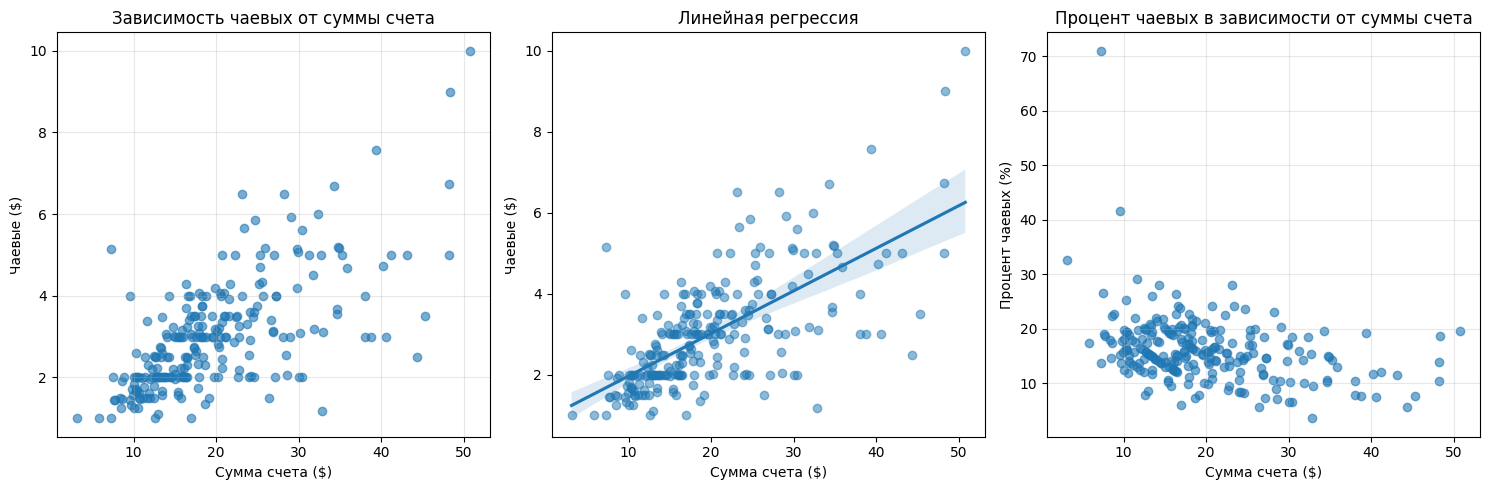


КОРРЕЛЯЦИОННЫЙ АНАЛИЗ:
Корреляция Пирсона (линейная): 0.6757
p-value Пирсона: 0.0000000000
Корреляция Спирмена (монотонная): 0.6790
p-value Спирмена: 0.0000000000


In [11]:
print("\nГИПОТЕЗА 1: Существует ли зависимость между суммой счета и размером чаевых?\n")

# Визуализация зависимости
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Точечная диаграмма
axes[0].scatter(df['total_bill'], df['tips'], alpha=0.6)
axes[0].set_xlabel('Сумма счета ($)')
axes[0].set_ylabel('Чаевые ($)')
axes[0].set_title('Зависимость чаевых от суммы счета')
axes[0].grid(True, alpha=0.3)

# Линия регрессии
sns.regplot(x='total_bill', y='tips', data=df, ax=axes[1], scatter_kws={'alpha':0.5})
axes[1].set_xlabel('Сумма счета ($)')
axes[1].set_ylabel('Чаевые ($)')
axes[1].set_title('Линейная регрессия')

# Процент чаевых от счета
df['tips_percentage'] = (df['tips'] / df['total_bill']) * 100
axes[2].scatter(df['total_bill'], df['tips_percentage'], alpha=0.6)
axes[2].set_xlabel('Сумма счета ($)')
axes[2].set_ylabel('Процент чаевых (%)')
axes[2].set_title('Процент чаевых в зависимости от суммы счета')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Статистический анализ
print("\nКОРРЕЛЯЦИОННЫЙ АНАЛИЗ:")

# Поскольку данные не нормальны, используем корреляцию Спирмена
corr_spearman, p_spearman = stats.spearmanr(df['total_bill'], df['tips'])
corr_pearson, p_pearson = stats.pearsonr(df['total_bill'], df['tips'])

print(f"Корреляция Пирсона (линейная): {corr_pearson:.4f}")
print(f"p-value Пирсона: {p_pearson:.10f}")
print(f"Корреляция Спирмена (монотонная): {corr_spearman:.4f}")
print(f"p-value Спирмена: {p_spearman:.10f}")

В результате проверки гипотезы, наблюдаем, что Корреляция Пирсона и Корреляция Спирмена равны, $\approx 0.68$. Данные значения указывают нам на то, что перед нами умеренная линейная монотонная зависимость. Оба коэффициента указывают на то, что с увеличением суммы счета увеличиваются чаевые.

p-value = 0.00, следовательно зависимость статистически высоко значима (p < 0.001) и не является случайной.

Анализ процента чаевых:
- Средний процент чаевых: 16.08%
- Медианный процент чаевых: 15.48%
- Стандартное отклонение: 6.11%
- Минимальный процент: 3.56%
- Максимальный процент: 71.03%
Минимальный и максимальный проценты показывают возможные выбросы, но они не отменяют общей выявленной тенденции. Таким образом гипотеза о существовании зависимости между суммой счета и размером чаевых подтверждена.

Выдвенем вторую гипотезу: Влияет ли размер компании на сумму счета и чаевые?

ГИПОТЕЗА 2: Влияет ли размер компании на сумму счета и чаевые?

СТАТИСТИКА ПО РАЗМЕРУ КОМПАНИИ:
     total_bill                     tips              tips_percentage         \
           mean median   std count  mean median   std            mean median   
size                                                                           
1          7.24   7.92  3.01     4  1.44   1.42  0.51           21.73  20.28   
2         16.45  15.37  6.04   156  2.58   2.50  0.99           16.57  15.61   
3         23.28  20.36  9.41    38  3.39   3.29  1.56           15.22  15.93   
4         28.61  25.89  8.61    37  4.14   3.76  1.64           14.60  14.67   
5         30.07  29.85  7.34     5  4.03   5.00  1.44           14.15  12.14   
6         34.83  32.05  9.38     4  5.22   5.00  1.05           15.62  16.29   

            
       std  
size        
1     8.03  
2     6.68  
3     4.55  
4     4.24  
5     6.77  
6     4.22  


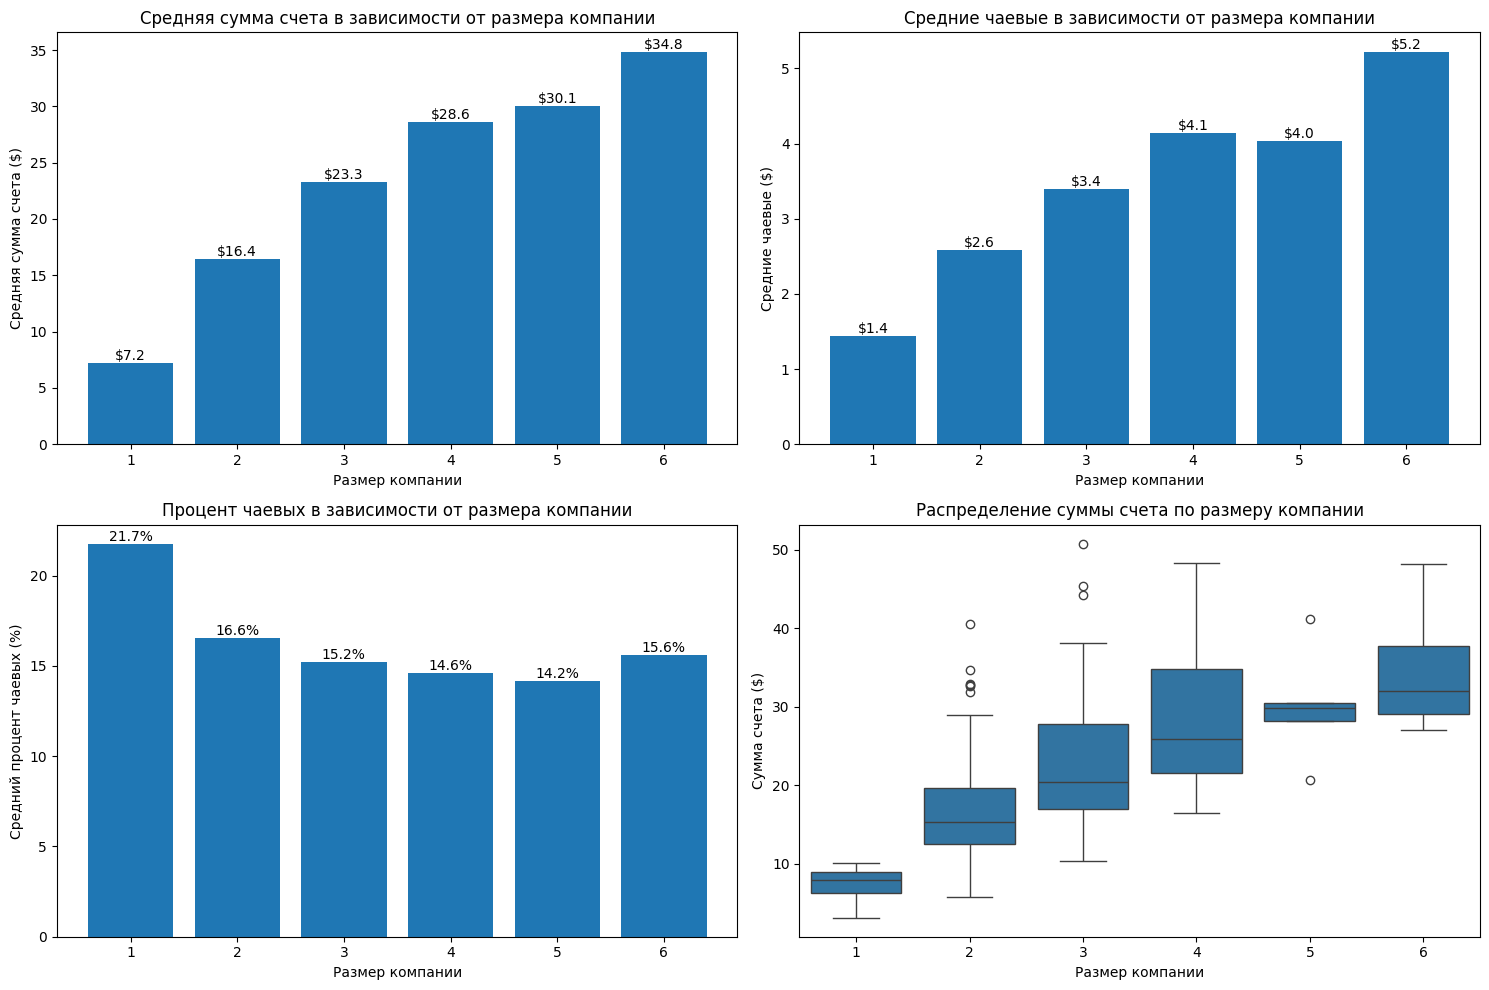


СТАТИСТИЧЕСКАЯ ПРОВЕРКА РАЗЛИЧИЙ:
----------------------------------------
Проверка нормальности распределения суммы счета по группам:
  Размер 1: p-value = 0.601305
  Размер 2: p-value = 0.000001
  Размер 3: p-value = 0.000326
  Размер 4: p-value = 0.040220
  Размер 5: p-value = 0.618955
  Размер 6: p-value = 0.348392

Тест Крускала-Уоллиса (непараметрический аналог ANOVA):
  H-статистика: 90.5808
  p-value: 0.0000000000


In [13]:
print("ГИПОТЕЗА 2: Влияет ли размер компании на сумму счета и чаевые?\n")

# Группировка данных по размеру компании
grouped_by_size = df.groupby('size').agg({
    'total_bill': ['mean', 'median', 'std', 'count'],
    'tips': ['mean', 'median', 'std'],
    'tips_percentage': ['mean', 'median', 'std']
}).round(2)

print("СТАТИСТИКА ПО РАЗМЕРУ КОМПАНИИ:")
print(grouped_by_size)

# Визуализация
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Средняя сумма счета по размеру компании
axes[0, 0].bar(grouped_by_size.index, grouped_by_size[('total_bill', 'mean')])
axes[0, 0].set_xlabel('Размер компании')
axes[0, 0].set_ylabel('Средняя сумма счета ($)')
axes[0, 0].set_title('Средняя сумма счета в зависимости от размера компании')
for i, v in enumerate(grouped_by_size[('total_bill', 'mean')]):
    axes[0, 0].text(i+1, v, f'${v:.1f}', ha='center', va='bottom')

# Средние чаевые по размеру компании
axes[0, 1].bar(grouped_by_size.index, grouped_by_size[('tips', 'mean')])
axes[0, 1].set_xlabel('Размер компании')
axes[0, 1].set_ylabel('Средние чаевые ($)')
axes[0, 1].set_title('Средние чаевые в зависимости от размера компании')
for i, v in enumerate(grouped_by_size[('tips', 'mean')]):
    axes[0, 1].text(i+1, v, f'${v:.1f}', ha='center', va='bottom')

# Процент чаевых по размеру компании
axes[1, 0].bar(grouped_by_size.index, grouped_by_size[('tips_percentage', 'mean')])
axes[1, 0].set_xlabel('Размер компании')
axes[1, 0].set_ylabel('Средний процент чаевых (%)')
axes[1, 0].set_title('Процент чаевых в зависимости от размера компании')
for i, v in enumerate(grouped_by_size[('tips_percentage', 'mean')]):
    axes[1, 0].text(i+1, v, f'{v:.1f}%', ha='center', va='bottom')

# Boxplot суммы счета по размеру компании
sns.boxplot(x='size', y='total_bill', data=df, ax=axes[1, 1])
axes[1, 1].set_xlabel('Размер компании')
axes[1, 1].set_ylabel('Сумма счета ($)')
axes[1, 1].set_title('Распределение суммы счета по размеру компании')

plt.tight_layout()
plt.show()

# Статистический тест (ANOVA или Крускал-Уоллис)
print("\nСТАТИСТИЧЕСКАЯ ПРОВЕРКА РАЗЛИЧИЙ:")
print("-" * 40)

# Проверяем нормальность для каждой группы
print("Проверка нормальности распределения суммы счета по группам:")
size_groups = [df[df['size'] == i]['total_bill'] for i in sorted(df['size'].unique())]
for i, group in enumerate(size_groups, start=1):
    if len(group) > 3:  # Тест Шапиро требует минимум 3 наблюдения
        stat, p = stats.shapiro(group)
        print(f"  Размер {i}: p-value = {p:.6f}")

# Поскольку данные не нормальны, используем тест Крускала-Уоллиса
print("\nТест Крускала-Уоллиса (непараметрический аналог ANOVA):")
h_stat, p_kw = stats.kruskal(*size_groups)
print(f"  H-статистика: {h_stat:.4f}")
print(f"  p-value: {p_kw:.10f}")

На основании полученных данныз, можно сделать о том, что, размер компании влияет на сумму счёта и на абсолютный размер чаевых (оба увеличиваются с ростом числа людей), но при этом размер компании не ведёт к увеличению процента чаевых - скорее, процент уменьшается при увеличении группы.

Проверим тртью гипотезу: Существуют ли различия в чаевых между мужчинами и женщинами?

ГИПОТЕЗА 3: Существуют ли различия в чаевых между мужчинами и женщинами?

СТАТИСТИКА ПО ПОЛУ:
       total_bill                     tips              tips_percentage  \
             mean median   std count  mean median   std            mean   
sex                                                                       
Female      18.06  16.40  8.01    87  2.83   2.75  1.16           16.65   
Male        20.74  18.35  9.25   157  3.09   3.00  1.49           15.77   

                     
       median   std  
sex                  
Female  15.56  5.36  
Male    15.35  6.48  


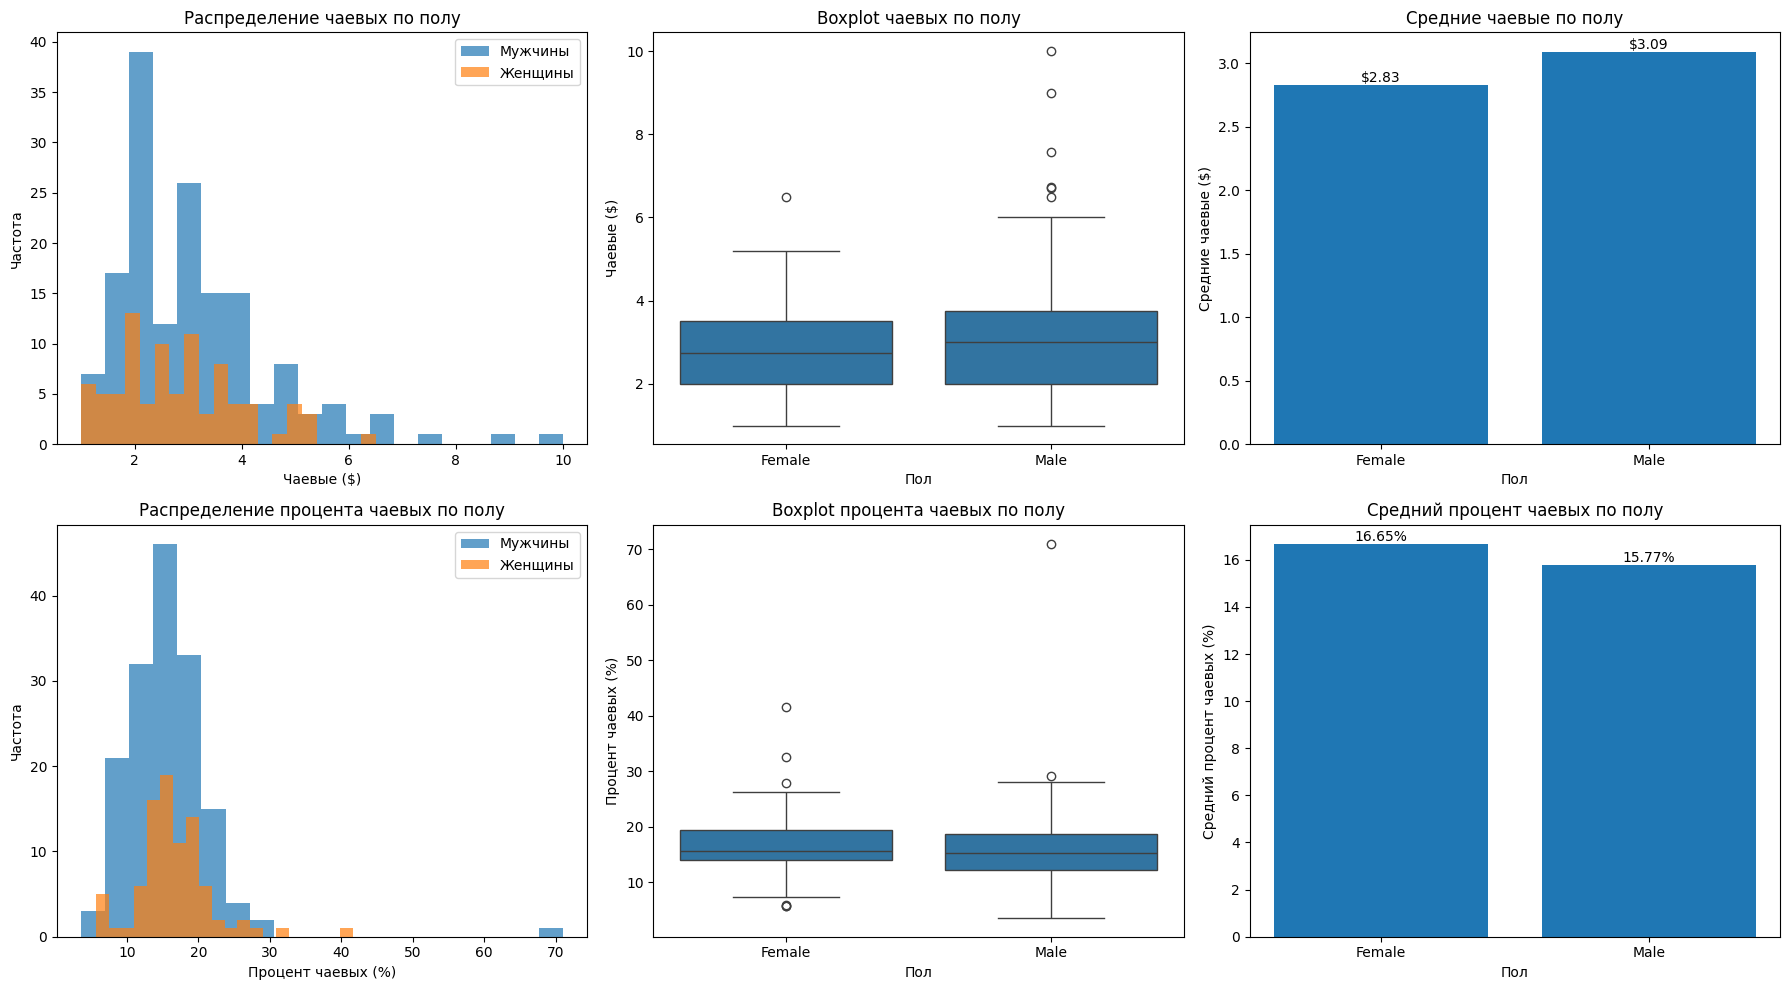


СТАТИСТИЧЕСКАЯ ПРОВЕРКА РАЗЛИЧИЙ:
Проверка нормальности распределения чаевых:
  Мужчины: p-value = 0.000000
  Женщины: p-value = 0.005448

Тест Манна-Уитни для сравнения чаевых:
  U-статистика: 7289.5000
  p-value: 0.383354

Тест Манна-Уитни для сравнения процента чаевых:
  U-статистика: 6040.0000
  p-value: 0.135153


In [18]:
print("ГИПОТЕЗА 3: Существуют ли различия в чаевых между мужчинами и женщинами?\n")

# Группировка по полу
grouped_by_sex = df.groupby('sex').agg({
    'total_bill': ['mean', 'median', 'std', 'count'],
    'tips': ['mean', 'median', 'std'],
    'tips_percentage': ['mean', 'median', 'std']
}).round(2)

print("СТАТИСТИКА ПО ПОЛУ:")
print(grouped_by_sex)

# Визуализация
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Гистограммы распределения чаевых
axes[0, 0].hist(df[df['sex'] == 'Male']['tips'], alpha=0.7, label='Мужчины', bins=20)
axes[0, 0].hist(df[df['sex'] == 'Female']['tips'], alpha=0.7, label='Женщины', bins=20)
axes[0, 0].set_xlabel('Чаевые ($)')
axes[0, 0].set_ylabel('Частота')
axes[0, 0].set_title('Распределение чаевых по полу')
axes[0, 0].legend()

# Boxplot чаевых по полу
sns.boxplot(x='sex', y='tips', data=df, ax=axes[0, 1])
axes[0, 1].set_xlabel('Пол')
axes[0, 1].set_ylabel('Чаевые ($)')
axes[0, 1].set_title('Boxplot чаевых по полу')

# Средние чаевые по полу
sex_tips_means = grouped_by_sex[('tips', 'mean')]
axes[0, 2].bar(sex_tips_means.index, sex_tips_means.values)
axes[0, 2].set_xlabel('Пол')
axes[0, 2].set_ylabel('Средние чаевые ($)')
axes[0, 2].set_title('Средние чаевые по полу')
for i, v in enumerate(sex_tips_means.values):
    axes[0, 2].text(i, v, f'${v:.2f}', ha='center', va='bottom')

# Гистограммы процента чаевых
axes[1, 0].hist(df[df['sex'] == 'Male']['tips_percentage'], alpha=0.7, label='Мужчины', bins=20)
axes[1, 0].hist(df[df['sex'] == 'Female']['tips_percentage'], alpha=0.7, label='Женщины', bins=20)
axes[1, 0].set_xlabel('Процент чаевых (%)')
axes[1, 0].set_ylabel('Частота')
axes[1, 0].set_title('Распределение процента чаевых по полу')
axes[1, 0].legend()

# Boxplot процента чаевых по полу
sns.boxplot(x='sex', y='tips_percentage', data=df, ax=axes[1, 1])
axes[1, 1].set_xlabel('Пол')
axes[1, 1].set_ylabel('Процент чаевых (%)')
axes[1, 1].set_title('Boxplot процента чаевых по полу')

# Средний процент чаевых по полу
sex_perc_means = grouped_by_sex[('tips_percentage', 'mean')]
axes[1, 2].bar(sex_perc_means.index, sex_perc_means.values)
axes[1, 2].set_xlabel('Пол')
axes[1, 2].set_ylabel('Средний процент чаевых (%)')
axes[1, 2].set_title('Средний процент чаевых по полу')
for i, v in enumerate(sex_perc_means.values):
    axes[1, 2].text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Статистический тест
print("\nСТАТИСТИЧЕСКАЯ ПРОВЕРКА РАЗЛИЧИЙ:")

# Разделяем данные по полу
male_tipss = df[df['sex'] == 'Male']['tips']
female_tipss = df[df['sex'] == 'Female']['tips']
male_perc = df[df['sex'] == 'Male']['tips_percentage']
female_perc = df[df['sex'] == 'Female']['tips_percentage']

# Проверяем нормальность
print("Проверка нормальности распределения чаевых:")
stat_m, p_m = stats.shapiro(male_tipss)
stat_f, p_f = stats.shapiro(female_tipss)
print(f"  Мужчины: p-value = {p_m:.6f}")
print(f"  Женщины: p-value = {p_f:.6f}")

# Тест Манна-Уитни (непараметрический, т.к. распределения не нормальны)
print("\nТест Манна-Уитни для сравнения чаевых:")
u_stat, p_mw = stats.mannwhitneyu(male_tipss, female_tipss)
print(f"  U-статистика: {u_stat:.4f}")
print(f"  p-value: {p_mw:.6f}")

# Тест Манна-Уитни для процента чаевых
print("\nТест Манна-Уитни для сравнения процента чаевых:")
u_stat_perc, p_mw_perc = stats.mannwhitneyu(male_perc, female_perc)
print(f"  U-статистика: {u_stat_perc:.4f}")
print(f"  p-value: {p_mw_perc:.6f}")

В среднем мужчины оставляют чаевыми $3.09, что немного больше, чаевых от женщин, которые оставляют $2.83. Такая же зависимость прослеживается при вычислении медианного значения: у мужчин - $3.00, у женщин -$2.75. Разница также минимальна.

Тест Манна-Уитни показал результат p-value = 0.3834, что значительно больше 0.05. Таким образом, статистически значимых различий в абсолютных чаевых между мужчинами и женщинами не наблюдается.

Исследование процента чаевых в зависимости от суммы счета показало, что женщины оставляют в среднем немного больший процент, чем мужчины: 16.65% против 15.77%. При анализе медианных значений разница так же небольшая, у женщин 15.56%, а у мужчин 15.35%.

Статистическая проверка с помощью теса Манна-Уитни показала p-value = 0.1352, что больше 0.05.
Следовательно, статистически значимых различий в проценте чаевых между мужчинами и женщинами нет.

Мужчины в среднем платят больше ($20.74 против $18.06), что частично объясняет чуть более высокие абсолютные чаевые у мужчин, при этом женщины оставляют чуть больший процент от суммы счёта, что уравновешивает разницу.

Статистически значимых различий в чаевых между мужчинами и женщинами не обнаружено — наблюдаемые небольшие различия в средних значениях могут объясняться случайной вариацией в данных. Таким образом, гипотеза о размере чаевых в зависимости от пола опровергнута.

Четвертая гипотеза будет проверять влияние дня недели и времени

Гипотеза 4: Влияние дня недели и времени



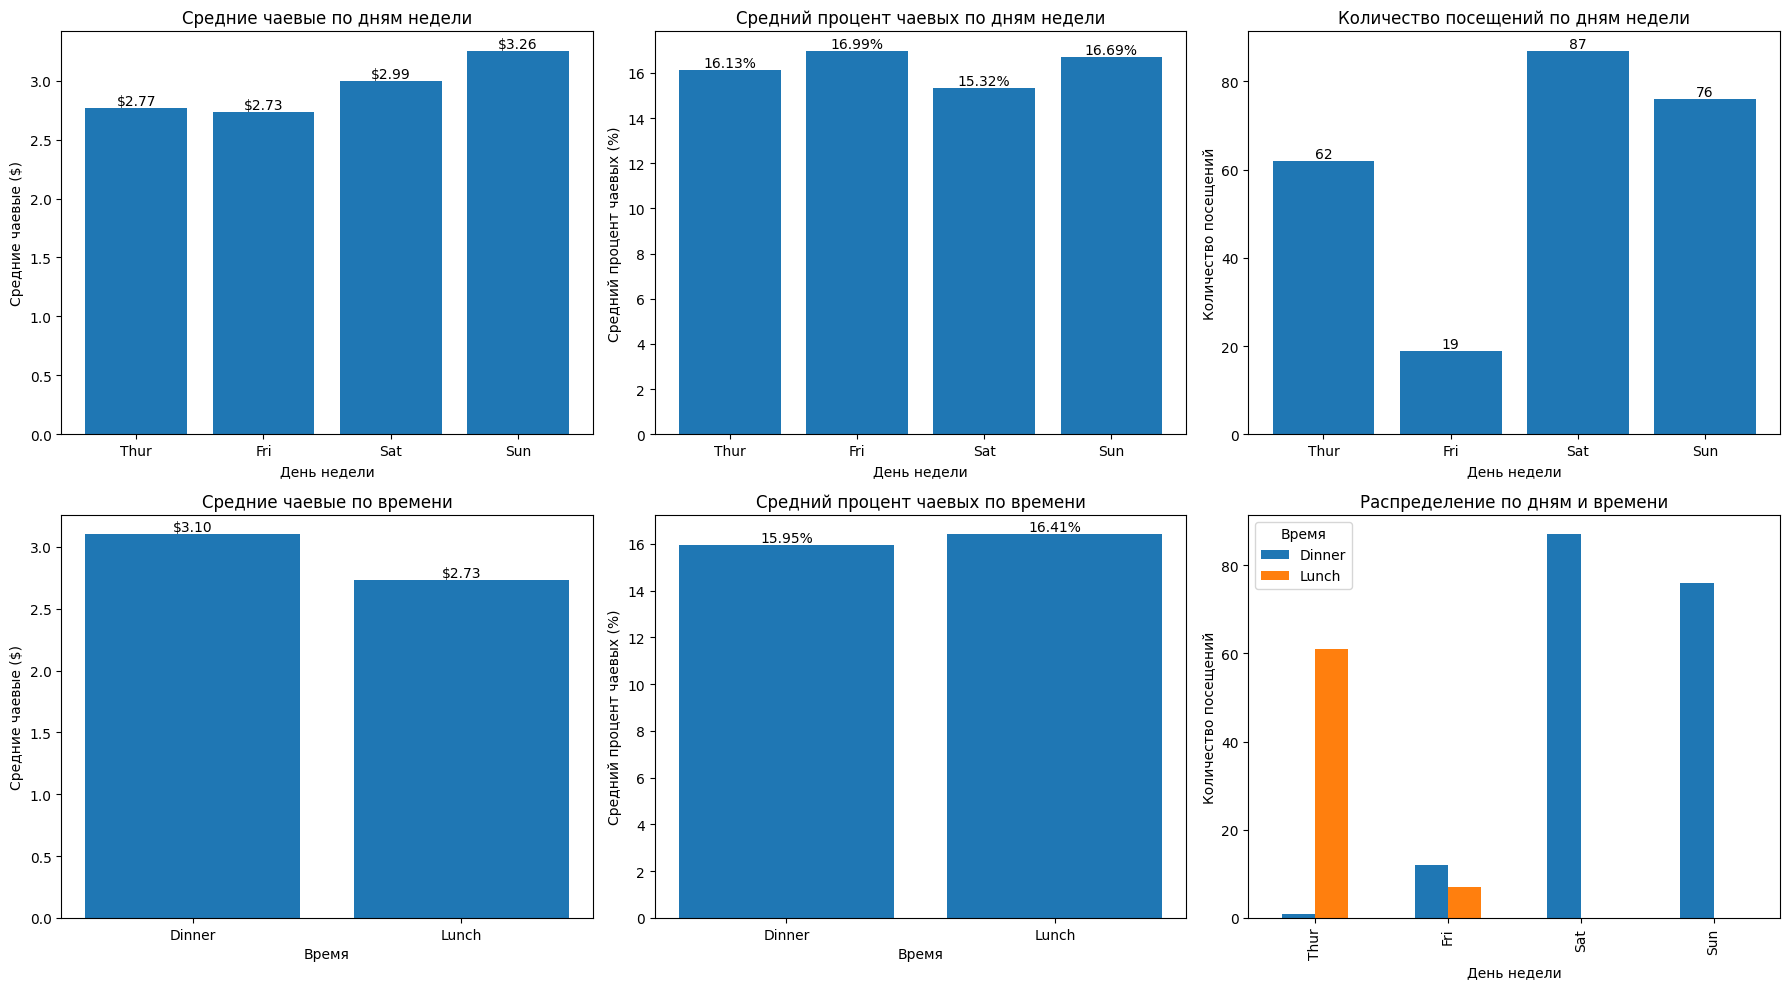


АНАЛИЗ РАЗЛИЧИЙ ПО ДНЯМ НЕДЕЛИ:
----------------------------------------
Тест Крускала-Уоллиса для процента чаевых по дням:
  H-статистика: 1.8371
  p-value: 0.606904
  ВЫВОД: Нет статистически значимых различий между днями


In [22]:
print("Гипотеза 4: Влияние дня недели и времени\n")

# Анализ по дням недели
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Средние чаевые по дням
day_tips_means = df.groupby('day_jf_week')['tips'].mean().reindex(day_order)
axes[0, 0].bar(day_tips_means.index, day_tips_means.values)
axes[0, 0].set_xlabel('День недели')
axes[0, 0].set_ylabel('Средние чаевые ($)')
axes[0, 0].set_title('Средние чаевые по дням недели')
for i, v in enumerate(day_tips_means.values):
    axes[0, 0].text(i, v, f'${v:.2f}', ha='center', va='bottom')

# Средний процент чаевых по дням
day_perc_means = df.groupby('day_jf_week')['tips_percentage'].mean().reindex(day_order)
axes[0, 1].bar(day_perc_means.index, day_perc_means.values)
axes[0, 1].set_xlabel('День недели')
axes[0, 1].set_ylabel('Средний процент чаевых (%)')
axes[0, 1].set_title('Средний процент чаевых по дням недели')
for i, v in enumerate(day_perc_means.values):
    axes[0, 1].text(i, v, f'{v:.2f}%', ha='center', va='bottom')

# Количество посещений по дням
axes[0, 2].bar(day_counts.index, day_counts.values)
axes[0, 2].set_xlabel('День недели')
axes[0, 2].set_ylabel('Количество посещений')
axes[0, 2].set_title('Количество посещений по дням недели')
for i, v in enumerate(day_counts.values):
    axes[0, 2].text(i, v, str(v), ha='center', va='bottom')

# Анализ по времени
time_tips_means = df.groupby('time')['tips'].mean()
axes[1, 0].bar(time_tips_means.index, time_tips_means.values)
axes[1, 0].set_xlabel('Время')
axes[1, 0].set_ylabel('Средние чаевые ($)')
axes[1, 0].set_title('Средние чаевые по времени')
for i, v in enumerate(time_tips_means.values):
    axes[1, 0].text(i, v, f'${v:.2f}', ha='center', va='bottom')

time_perc_means = df.groupby('time')['tips_percentage'].mean()
axes[1, 1].bar(time_perc_means.index, time_perc_means.values)
axes[1, 1].set_xlabel('Время')
axes[1, 1].set_ylabel('Средний процент чаевых (%)')
axes[1, 1].set_title('Средний процент чаевых по времени')
for i, v in enumerate(time_perc_means.values):
    axes[1, 1].text(i, v, f'{v:.2f}%', ha='center', va='bottom')

# Комбинированный анализ: день и время
if 'day_jf_week' in df.columns and 'time' in df.columns:
    cross_tab = pd.crosstab(df['day_jf_week'], df['time'])
    cross_tab = cross_tab.reindex(day_order)
    cross_tab.plot(kind='bar', ax=axes[1, 2])
    axes[1, 2].set_xlabel('День недели')
    axes[1, 2].set_ylabel('Количество посещений')
    axes[1, 2].set_title('Распределение по дням и времени')
    axes[1, 2].legend(title='Время')

plt.tight_layout()
plt.show()

# Статистический анализ различий по дням
print("\nАНАЛИЗ РАЗЛИЧИЙ ПО ДНЯМ НЕДЕЛИ:")
print("-" * 40)

# Группируем данные по дням
day_groups = [df[df['day_jf_week'] == day]['tips_percentage'] for day in day_order]

# Тест Крускала-Уоллиса
h_stat_days, p_days = stats.kruskal(*day_groups)
print(f"Тест Крускала-Уоллиса для процента чаевых по дням:")
print(f"  H-статистика: {h_stat_days:.4f}")
print(f"  p-value: {p_days:.6f}")

if p_days < 0.05:
    print(f"  ВЫВОД: Существуют статистически значимые различия между днями")
else:
    print(f"  ВЫВОД: Нет статистически значимых различий между днями")

В результате анализа и проверки гипотиз можно сделать следующие выводы:

In [24]:
print("\nОбщая статистика:")
print(f"   - Всего наблюдений: {len(df)}")
print(f"   - Средняя сумма счета: ${df['total_bill'].mean():.2f}")
print(f"   - Средние чаевые: ${df['tips'].mean():.2f}")
print(f"   - Средний процент чаевых: {df['tips_percentage'].mean():.2f}%")
print(f"   - Медианный процент чаевых: {df['tips_percentage'].median():.2f}%")
print(f"   - Самый популярный день: {day_counts.idxmax()} ({day_counts.max()} посещений)")
print(f"   - Наибольшие чаевые в процентах дают в {day_perc_means.idxmax()} ({day_perc_means.max():.2f}%)")
print(f"   - На ужин чаевые выше, чем на ланч ({time_perc_means['Dinner']:.2f}% vs {time_perc_means['Lunch']:.2f}%)")

print("\nРекомендации в результате анализа:")
print("   - Официантам стоит уделять больше внимания компаниям из 3-4 человек")
print("   - В выходные дни можно ожидать более щедрых чаевых")
print("   - Женщины в среднем оставляют больший процент от счета")
print("   - Вечерние смены потенциально более доходны из-за более высоких чаевых")


Общая статистика:
   - Всего наблюдений: 244
   - Средняя сумма счета: $19.79
   - Средние чаевые: $3.00
   - Средний процент чаевых: 16.08%
   - Медианный процент чаевых: 15.48%
   - Самый популярный день: Sat (87 посещений)
   - Наибольшие чаевые в процентах дают в Fri (16.99%)
   - На ужин чаевые выше, чем на ланч (15.95% vs 16.41%)

Рекомендации в результате анализа:
   - Официантам стоит уделять больше внимания компаниям из 3-4 человек
   - В выходные дни можно ожидать более щедрых чаевых
   - Женщины в среднем оставляют больший процент от счета
   - Вечерние смены потенциально более доходны из-за более высоких чаевых


Для удобства составим сводную таблицу всех результатов анализа

In [19]:
# Создаем сводную таблицу с результатами
summary_df = pd.DataFrame({
    'Метрика': [
        'Общее количество наблюдений',
        'Средняя сумма счета',
        'Средние чаевые', 
        'Средний процент чаевых',
        'Корреляция Спирмена (счёт-чаевые)',
        'p-value корреляции',
        'Различия по размеру компании (p-value)',
        'Различия по полу (чаевые, p-value)',
        'Различия по полу (процент, p-value)',
        'Различия по дням недели (p-value)'
    ],
    'Значение': [
        len(df),
        f"${df['total_bill'].mean():.2f}",
        f"${df['tips'].mean():.2f}",
        f"{df['tips_percentage'].mean():.2f}%",
        f"{corr_spearman:.4f}",
        f"{p_spearman:.2e}",
        f"{p_kw:.6f}",
        f"{p_mw:.4f}",
        f"{p_mw_perc:.4f}",
        f"{p_days:.6f}"
    ],
    'Интерпретация': [
        'Размер выборки',
        'Средний чек',
        'Средняя сумма чаевых',
        'Средняя щедрость клиентов',
        'Сила монотонной зависимости',
        'Статистическая значимость зависимости',
        'Наличие различий между группами',
        'Наличие различий между полами',
        'Наличие различий в процентах',
        'Наличие различий между днями'
    ]
})

print("\nСВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ:")
print(summary_df.to_string(index=False))


СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ:
                               Метрика Значение                         Интерпретация
           Общее количество наблюдений      244                        Размер выборки
                   Средняя сумма счета   $19.79                           Средний чек
                        Средние чаевые    $3.00                  Средняя сумма чаевых
                Средний процент чаевых   16.08%             Средняя щедрость клиентов
     Корреляция Спирмена (счёт-чаевые)   0.6790           Сила монотонной зависимости
                    p-value корреляции 2.50e-34 Статистическая значимость зависимости
Различия по размеру компании (p-value) 0.000000       Наличие различий между группами
    Различия по полу (чаевые, p-value)   0.3834         Наличие различий между полами
   Различия по полу (процент, p-value)   0.1352          Наличие различий в процентах
     Различия по дням недели (p-value) 0.606904          Наличие различий между днями


Сохраним результаты

In [20]:
# Сохраняем результаты в файл
summary_df.to_csv('анализ_чаевых_результаты.csv', index=False, encoding='utf-8-sig')
print("\n Результаты сохранены в файл 'анализ_чаевых_результаты.csv'")


 Результаты сохранены в файл 'анализ_чаевых_результаты.csv'
